### **Importing**

In [38]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV , KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error


### **Load Data**

In [2]:
df = pd.read_csv('/content/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### **Exploatroy Data Analysis**

In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in this dataset

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Categorical Data**

In [8]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [9]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [10]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [11]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [12]:
ethnicity = df['race/ethnicity'].value_counts()
fig = px.pie(values = ethnicity.values,
             names = ethnicity.index,
             color_discrete_sequence = px.colors.sequential.Sunset,
             title = "Race/Ethnicity distribution",
             hole = 0.8)
 
fig.update_traces(textinfo = 'label+percent', textfont_size=18)

fig.update_layout(
    font = dict(size = 20, family = "arial"),
    annotations = [dict(text = 'Race', x = 0.5, y = 0.5, font_size = 30, showarrow=False)]
)
fig.show()

In [13]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [14]:
parental_education = df['parental level of education'].value_counts()
fig = px.pie(values = parental_education.values,
             names = parental_education.index,
             color_discrete_sequence = px.colors.sequential.Sunset,
             title = "Parental Level Of Education",
             hole = 0.8)
 
fig.update_traces(textinfo = 'label+percent', textfont_size=14)

fig.update_layout(
    font = dict(size = 15, family = "arial"),
    annotations = [dict(text = "Parent's Education", x = 0.5, y = 0.5, font_size = 20, showarrow=False)]
)
fig.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='test preparation course', ylabel='count'>

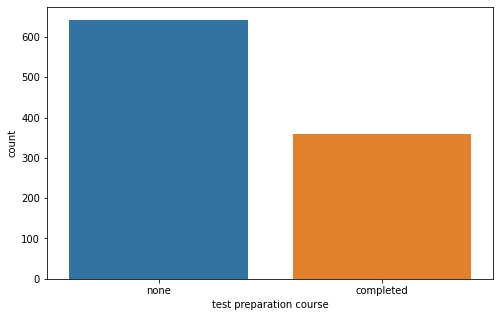

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(df['test preparation course'])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

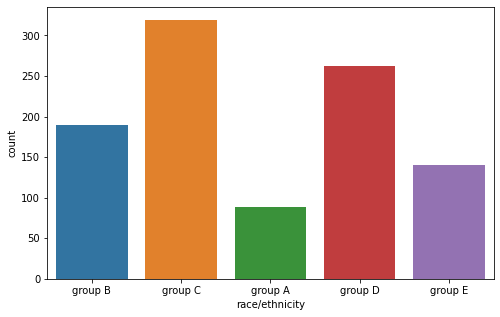

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(df['race/ethnicity'])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

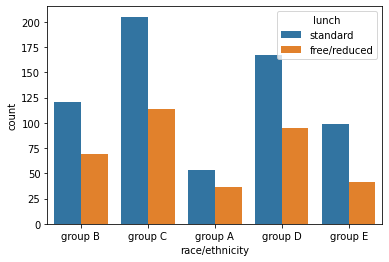

In [17]:

sns.countplot(df['race/ethnicity'], hue=df['lunch'])

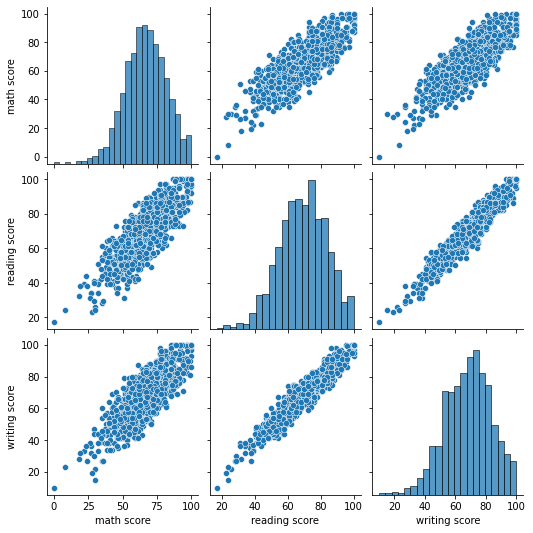

In [18]:

sns.pairplot(df)

<AxesSubplot:>

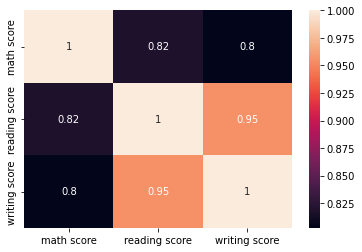

In [19]:

sns.heatmap(df.corr(), annot = True)

 there is a high correlation between reading and writing scores, both being subsets of the language category

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [21]:
num_cols = ['reading score', 'writing score']
cat_cols = ['gender', 'lunch', 'test preparation course','race/ethnicity','parental level of education']

In [22]:
pipeline = ColumnTransformer([
    ('std_scaler', StandardScaler(), num_cols),
    ('label_encode', OneHotEncoder(), cat_cols)], remainder= 'passthrough')

In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### **Random Forest Model (Math Score Prediction)**

**Split Data**

In [24]:
X = df.drop('math score', axis = 1)
y = df['math score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(750, 7) (250, 7) (750,) (250,)


In [26]:
X_train_prepared = pipeline.fit_transform(X_train)
X_test_prepared = pipeline.transform(X_test)

In [27]:
print(X_train_prepared.shape)

(750, 19)


In [28]:
# Creating Random Forest Model
rf = RandomForestRegressor(n_estimators=200)

In [29]:
# Training Model
rf.fit(X_train_prepared, y_train)

RandomForestRegressor(n_estimators=200)

In [30]:
# Predictions
predictions = rf.predict(X_test_prepared)

In [31]:
# Evaluating Model
print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))

MAE:  4.74416261904762
MSE:  36.84357857779195
RMSE:  6.0698911504072255


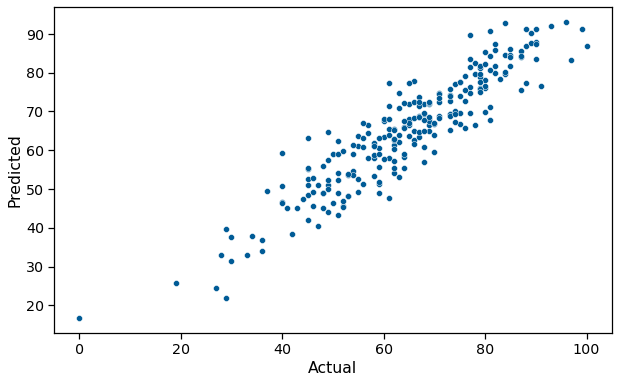

In [32]:
sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize= (10, 6))
sns.scatterplot(x= y_test, y=predictions , color= '#005b96')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='math score', ylabel='Density'>

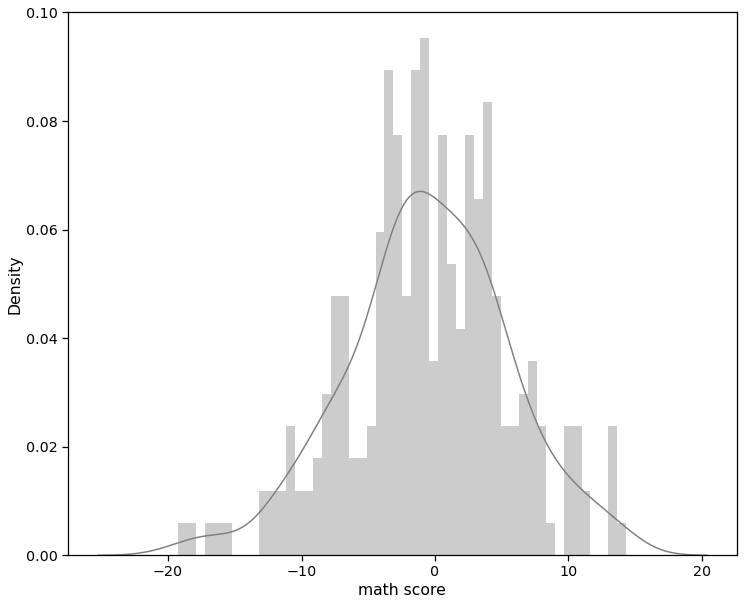

In [40]:
plt.figure(figsize=(12,10))
sns.distplot((y_test-predictions), bins = 50, color='gray')